In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/sales-forecasting/train.csv


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
data = pd.read_csv("../input/sales-forecasting/train.csv")

In [4]:
data.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales
0,1,CA-2017-152156,08/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600
1,2,CA-2017-152156,08/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400
2,3,CA-2017-138688,12/06/2017,16/06/2017,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,90036.0,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200
3,4,US-2016-108966,11/10/2016,18/10/2016,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775
4,5,US-2016-108966,11/10/2016,18/10/2016,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680


In [5]:
data.isnull().sum()

Row ID            0
Order ID          0
Order Date        0
Ship Date         0
Ship Mode         0
Customer ID       0
Customer Name     0
Segment           0
Country           0
City              0
State             0
Postal Code      11
Region            0
Product ID        0
Category          0
Sub-Category      0
Product Name      0
Sales             0
dtype: int64

In [6]:
data = data.dropna()

In [7]:
data.isnull().sum()

Row ID           0
Order ID         0
Order Date       0
Ship Date        0
Ship Mode        0
Customer ID      0
Customer Name    0
Segment          0
Country          0
City             0
State            0
Postal Code      0
Region           0
Product ID       0
Category         0
Sub-Category     0
Product Name     0
Sales            0
dtype: int64

In [8]:
data.shape

(9789, 18)

In [9]:
data.dtypes

Row ID             int64
Order ID          object
Order Date        object
Ship Date         object
Ship Mode         object
Customer ID       object
Customer Name     object
Segment           object
Country           object
City              object
State             object
Postal Code      float64
Region            object
Product ID        object
Category          object
Sub-Category      object
Product Name      object
Sales            float64
dtype: object

In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9789 entries, 0 to 9799
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Row ID         9789 non-null   int64  
 1   Order ID       9789 non-null   object 
 2   Order Date     9789 non-null   object 
 3   Ship Date      9789 non-null   object 
 4   Ship Mode      9789 non-null   object 
 5   Customer ID    9789 non-null   object 
 6   Customer Name  9789 non-null   object 
 7   Segment        9789 non-null   object 
 8   Country        9789 non-null   object 
 9   City           9789 non-null   object 
 10  State          9789 non-null   object 
 11  Postal Code    9789 non-null   float64
 12  Region         9789 non-null   object 
 13  Product ID     9789 non-null   object 
 14  Category       9789 non-null   object 
 15  Sub-Category   9789 non-null   object 
 16  Product Name   9789 non-null   object 
 17  Sales          9789 non-null   float64
dtypes: float

In [11]:
data['Order Date'] = pd.to_datetime(data['Order Date'])

In [12]:
data['Ship Date'] = pd.to_datetime(data['Ship Date'])

In [13]:
data.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales
0,1,CA-2017-152156,2017-08-11,2017-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600
1,2,CA-2017-152156,2017-08-11,2017-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400
2,3,CA-2017-138688,2017-12-06,2017-06-16,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,90036.0,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200
3,4,US-2016-108966,2016-11-10,2016-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775
4,5,US-2016-108966,2016-11-10,2016-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680


In [14]:
df = data.copy()

In [15]:
df.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales
0,1,CA-2017-152156,2017-08-11,2017-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600
1,2,CA-2017-152156,2017-08-11,2017-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400
2,3,CA-2017-138688,2017-12-06,2017-06-16,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,90036.0,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200
3,4,US-2016-108966,2016-11-10,2016-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775
4,5,US-2016-108966,2016-11-10,2016-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680


In [16]:
df = df.drop(['Row ID','Order ID','Product ID','Customer ID','Customer Name'],axis=1)

In [17]:
df.head()

,Order Date,Ship Date,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Product Name,Sales
0,2017-08-11,2017-11-11,Second Class,Consumer,United States,Henderson,Kentucky,42420.0,South,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600
1,2017-08-11,2017-11-11,Second Class,Consumer,United States,Henderson,Kentucky,42420.0,South,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400
2,2017-12-06,2017-06-16,Second Class,Corporate,United States,Los Angeles,California,90036.0,West,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200
3,2016-11-10,2016-10-18,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775
4,2016-11-10,2016-10-18,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680


In [18]:
df.isnull().sum()

Order Date      0
Ship Date       0
Ship Mode       0
Segment         0
Country         0
City            0
State           0
Postal Code     0
Region          0
Category        0
Sub-Category    0
Product Name    0
Sales           0
dtype: int64

In [19]:
data.duplicated().sum()

0

In [20]:
df['Segment'].value_counts()

Consumer       5096
Corporate      2948
Home Office    1745
Name: Segment, dtype: int64

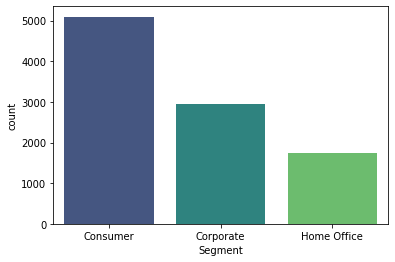

In [21]:
sns.countplot(x='Segment',data = df,palette = 'viridis')
plt.show()

# Sales over the month

In [22]:
df['ship month'] = df['Ship Date'].dt.month

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='ship month', ylabel='Sales'>

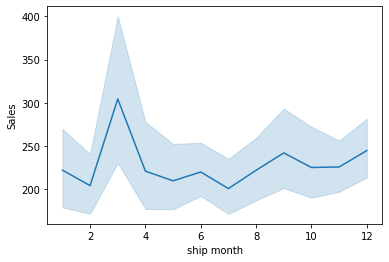

In [23]:
sns.lineplot('ship month','Sales',data = df)

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='Ship Date', ylabel='Sales'>

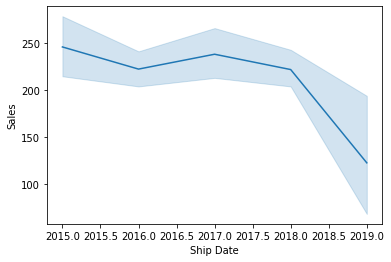

In [24]:
sns.lineplot(df['Ship Date'].dt.year,df['Sales'])

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='Order Date', ylabel='Sales'>

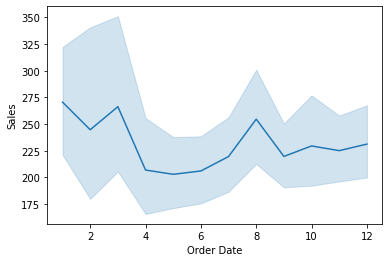

In [25]:
sns.lineplot(df['Order Date'].dt.month,df['Sales'])

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='Order Date', ylabel='Sales'>

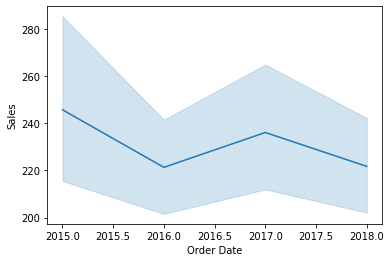

In [26]:
sns.lineplot(df['Order Date'].dt.year,df['Sales'])

In [27]:
df['Country'].value_counts()

United States    9789
Name: Country, dtype: int64

In [28]:
df['City'].value_counts()

New York City    891
Los Angeles      728
Philadelphia     532
San Francisco    500
Seattle          426
                ... 
San Mateo          1
Cheyenne           1
Conway             1
Melbourne          1
Springdale         1
Name: City, Length: 529, dtype: int64

In [29]:
df.groupby(['City'])

In [30]:
city_sales = pd.DataFrame(df.groupby(df['City']).sum()['Sales']).reset_index()

In [31]:
city_sales

,City,Sales
0,Aberdeen,25.500
1,Abilene,1.392
2,Akron,2724.244
3,Albuquerque,2220.160
4,Alexandria,5519.570
...,...,...
524,Woonsocket,195.550
525,Yonkers,7657.666
526,York,817.978
527,Yucaipa,50.800


In [32]:
s = city_sales.nlargest(10, 'Sales')
s

,City,Sales
327,New York City,252462.5470
265,Los Angeles,173420.1810
450,Seattle,116106.3220
436,San Francisco,109041.1200
372,Philadelphia,108841.7490
207,Houston,63956.1428
80,Chicago,47820.1330
435,San Diego,47521.0290
216,Jacksonville,44713.1830
123,Detroit,42446.9440


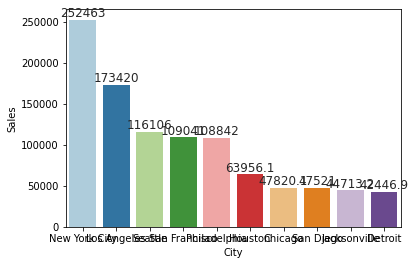

In [33]:
ax  = sns.barplot(x='City',y='Sales',data = s,palette = 'Paired')
sns.set(rc = {'figure.figsize':(15,10)})
plt.bar_label(ax.containers[0])
plt.show()

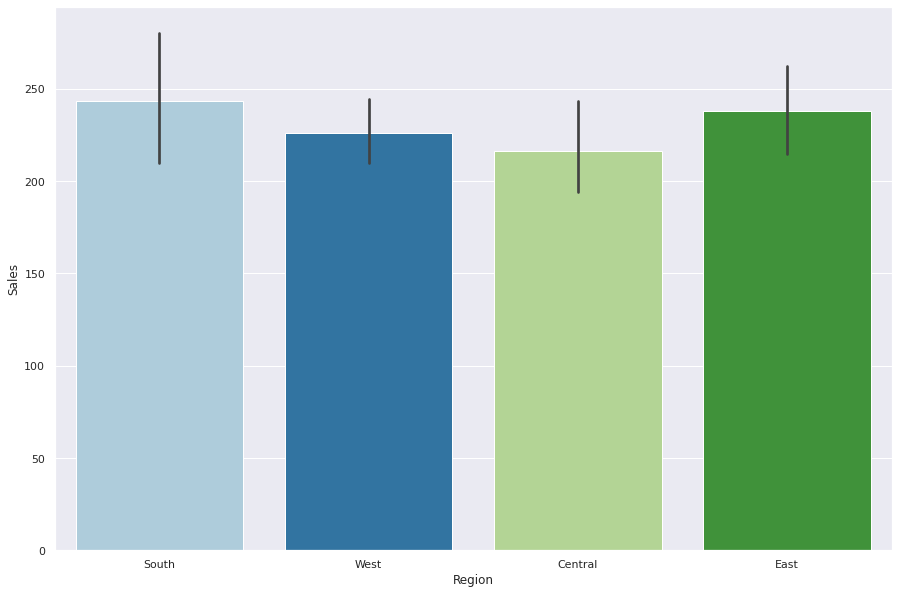

In [34]:
ax  = sns.barplot(x='Region',y='Sales',data = df,palette = 'Paired')
sns.set(rc = {'figure.figsize':(15,10)})
plt.show()

In [35]:
df['Product Name'].value_counts()

Staple envelope                                                              47
Staples                                                                      46
Easy-staple paper                                                            44
Avery Non-Stick Binders                                                      20
Staples in misc. colors                                                      18
                                                                             ..
Park Ridge Embossed Executive Business Envelopes                              1
Canon imageCLASS MF7460 Monochrome Digital Laser Multifunction Copier         1
Belkin 8 Outlet SurgeMaster II Gold Surge Protector with Phone Protection     1
Boston 1900 Electric Pencil Sharpener                                         1
LG G2                                                                         1
Name: Product Name, Length: 1848, dtype: int64

In [36]:
product_sales = pd.DataFrame(df.groupby(df['Product Name']).sum()['Sales']).reset_index()

In [37]:
product_sales = product_sales.nlargest(10, 'Sales')

In [38]:
product_sales

,Product Name,Sales
403,Canon imageCLASS 2200 Advanced Copier,61599.824
648,Fellowes PB500 Electric Punch Plastic Comb Bin...,27453.384
443,Cisco TelePresence System EX90 Videoconferenci...,22638.480
784,HON 5400 Series Task Chairs for Big and Tall,21870.576
684,GBC DocuBind TL300 Electric Binding System,19823.479
686,GBC Ibimaster 500 Manual ProClick Binding System,19024.500
803,Hewlett Packard LaserJet 3310 Copier,18839.686
785,HP Designjet T520 Inkjet Large Format Printer ...,18374.895
681,GBC DocuBind P400 Electric Binding System,17965.068
811,High Speed Automatic Electric Letter Opener,17030.312


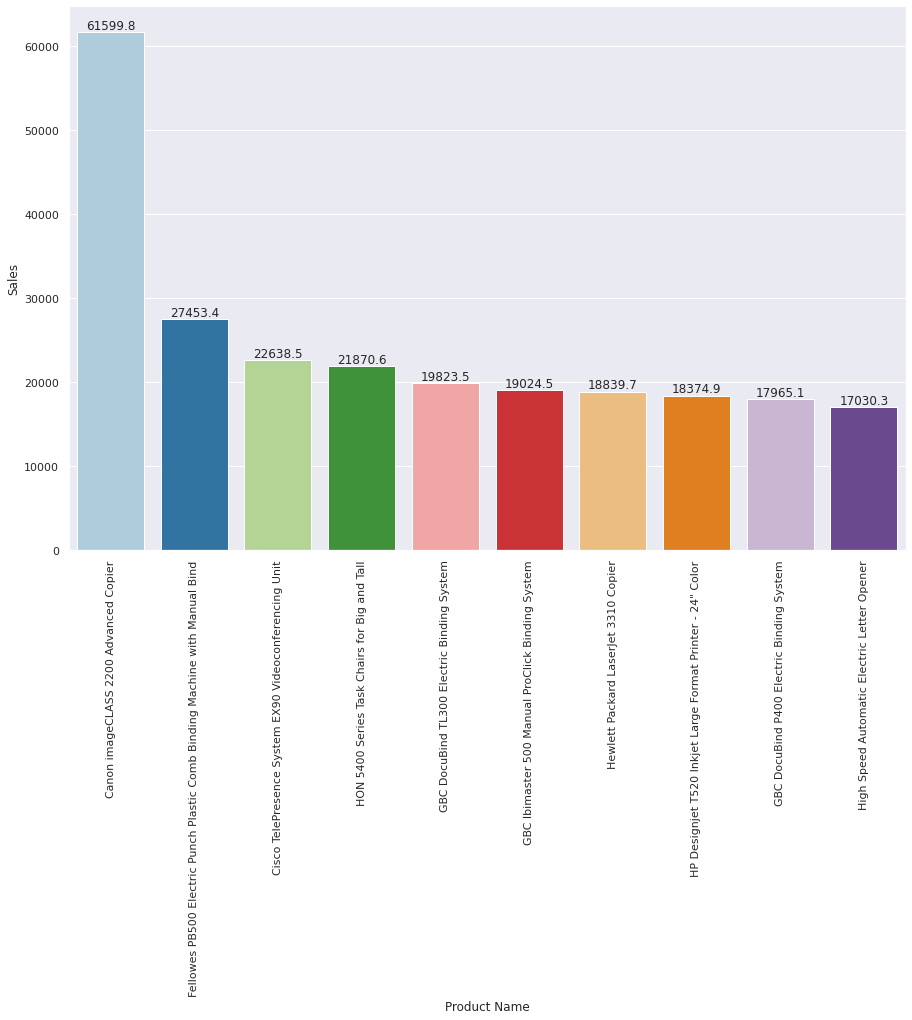

In [39]:
ax  = sns.barplot(x='Product Name',y='Sales',data = product_sales,palette = 'Paired')
sns.set(rc = {'figure.figsize':(15,10)})
plt.bar_label(ax.containers[0])
plt.xticks(rotation=90)
plt.show()

In [40]:
df['Ship Mode'].value_counts()

Standard Class    5849
Second Class      1901
First Class       1501
Same Day           538
Name: Ship Mode, dtype: int64

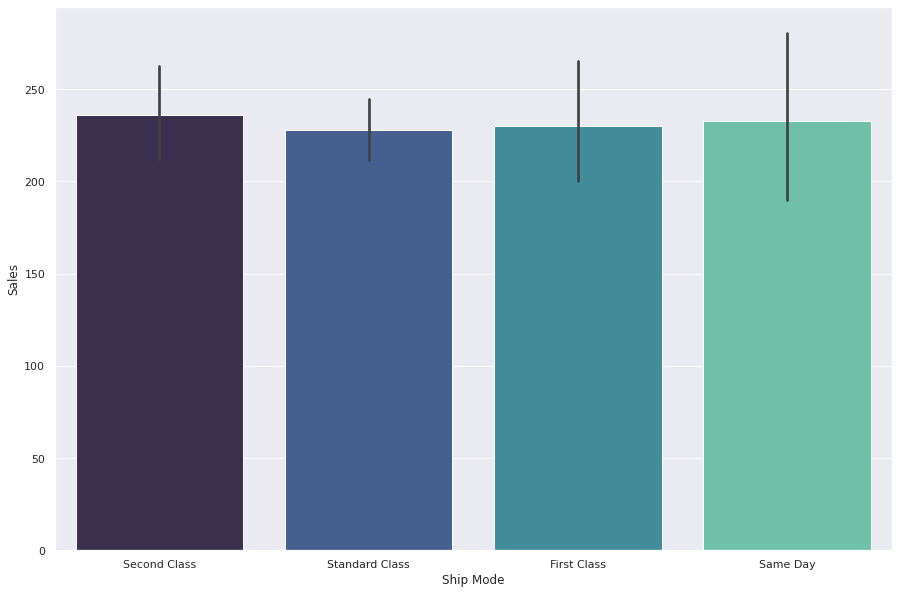

In [41]:
sns.barplot(x='Ship Mode',y = "Sales",data =df,palette = 'mako')
plt.show()

In [42]:
df['Category'].value_counts()

Office Supplies    5903
Furniture          2076
Technology         1810
Name: Category, dtype: int64

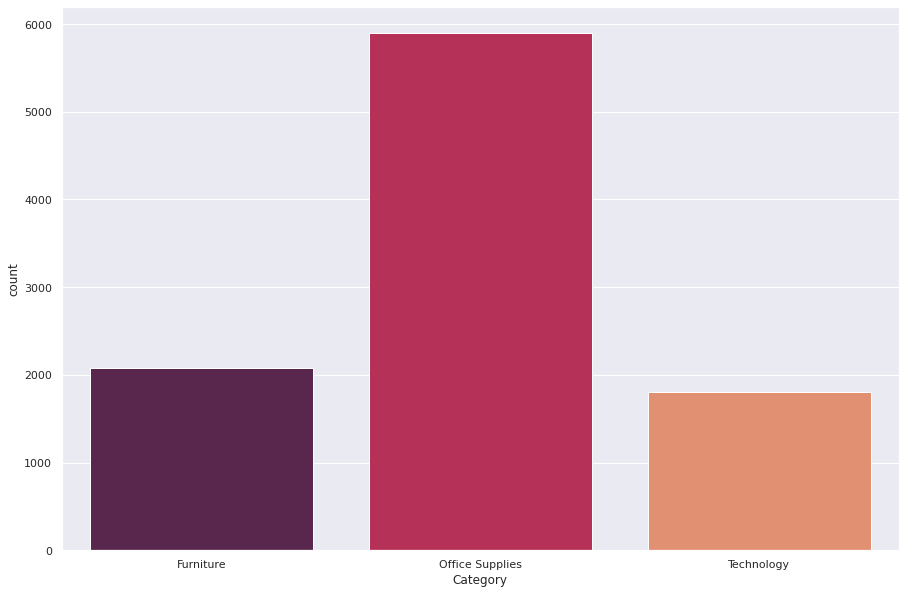

In [43]:
sns.countplot( x = 'Category',palette = 'rocket',data=df)
plt.show()

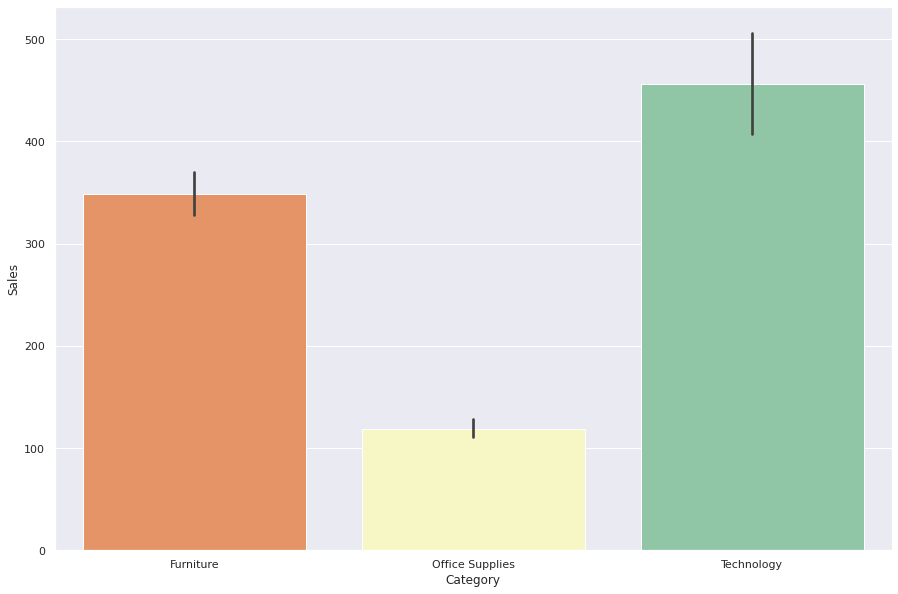

In [44]:
sns.barplot(x='Category',y="Sales",data=df,palette = 'Spectral')
plt.show()

In [45]:

df['Sub-Category'].value_counts()

Binders        1492
Paper          1336
Furnishings     931
Phones          875
Storage         831
Art             784
Accessories     754
Chairs          606
Appliances      458
Labels          357
Tables          314
Envelopes       247
Bookcases       225
Fasteners       214
Supplies        184
Machines        115
Copiers          66
Name: Sub-Category, dtype: int64

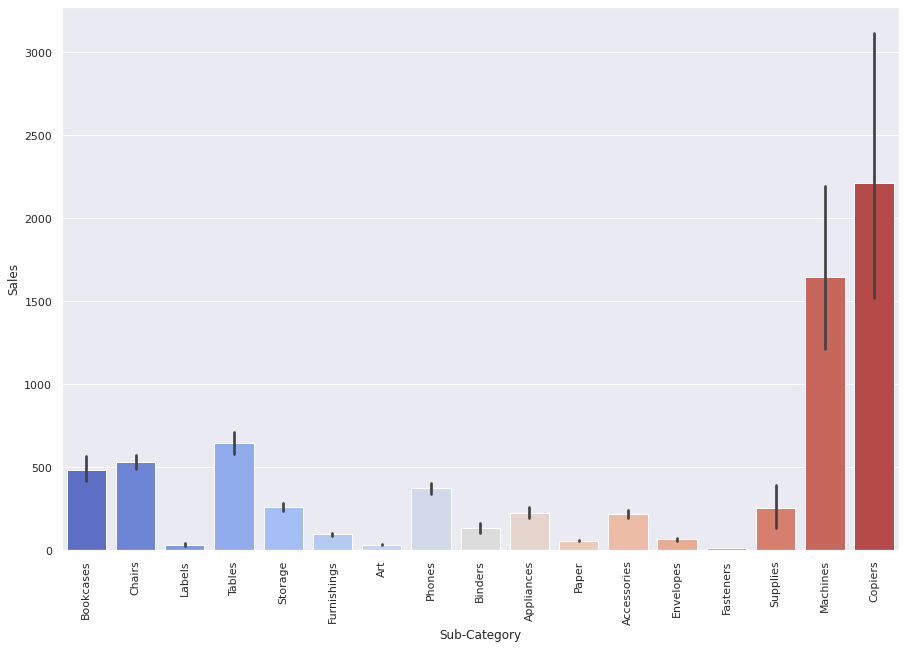

In [46]:
ax= sns.barplot(x='Sub-Category',y='Sales',data = df,palette = 'coolwarm')
plt.xticks(rotation=90)
plt.show()

<h3>If you have any queries please let me know, I'll happy to explain.</h3>

![](https://inventionland.com/wp-content/uploads/2015/09/National_Thank_You_Day.png)